    DOMAIN: Digital content and entertainment industry
    CONTEXT: The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classi ication algorithm to analyse the sentiment of the customers.
    DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to eencode any unknown word.
    PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.
    Steps and tasks: [ Total Score: 30 points]
    1. Import and analyse the data set.
    Hint: - Use `imdb.load_data()` method
    - Get train and test set
    - Take 10000 most frequent words
    2. Perform relevant sequence adding on the data
    3. Perform following data analysis:
    • Print shape of features and labels
    • Print value of any one feature and it's label
    4. Decode the feature value to get original sentence
    5. Design, train, tune and test a sequential model.
    Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classi iers. Be analytical and experimental here in trying new approaches to design the best model.
    6. Use the designed model to print the prediction on any one sample.
    Part A - Q1 - Import and analyse the data set. 	5
    Part A - Q2 - Perform relevant sequence adding on the data. 	5
    Part A - Q3 - Perform following data analysis: i) Print shape of features and labels ii) Print value of any one feature and it's label 	5
    Part A - Q4 - Decode the feature value to get original sentence 	5
    Part A - Q5 - Decode the feature value to get original sentence 	5
    Part A - Q6 - Use the designed model to print the prediction on any one sample.	5

step 1: 1. Import and analyse the data set.
Hint: - Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

In [72]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten, Dense, LSTM, Dropout, Bidirectional,SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras import regularizers
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from gensim.models import Word2Vec, Phrases
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import random
random.seed(0)

In [73]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [74]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(25000,) (25000,) (25000,) (25000,)


Print value of any one feature and it's label

In [75]:
print(X_train[0],y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1


In [76]:
len(X_train)

25000

Decode the feature value to get original sentence 

In [77]:
word_index = keras.datasets.imdb.get_word_index()
#word_index
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0                                                    # Padding
word_dict['>'] = 1                                                   # Start
word_dict['?'] = 2                                                   # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in X_train[0]),"\n sentiment: ",y_train[0])
print(' '.join(reverse_word_dict[id] for id in X_train[2]),"\nsentiment: ",y_train[2])

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

2. Perform relevant sequence adding on the data

In [78]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [79]:
vocabSize = 10000
embed_dim = 128

In [80]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocabSize, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(16,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_8 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16000)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                256016    
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_25 (Dense)             (None, 1)               

In [81]:
es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=100)
hist = model.fit(X_train, y_train, 
                 validation_data=(X_test, y_test), 
                 epochs=10,                  
                 callbacks=[es],
                 batch_size=32
                 )

_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 15s 617us/step - loss: 0.5517 - accuracy: 0.7384 - val_loss: 0.4149 - val_accuracy: 0.8694
Epoch 2/10
25000/25000 [==============================] - 14s 562us/step - loss: 0.3423 - accuracy: 0.9155 - val_loss: 0.4426 - val_accuracy: 0.8689
Epoch 3/10
25000/25000 [==============================] - 14s 549us/step - loss: 0.2480 - accuracy: 0.9566 - val_loss: 0.5027 - val_accuracy: 0.8655
Epoch 4/10
25000/25000 [==============================] - 14s 559us/step - loss: 0.2057 - accuracy: 0.9740 - val_loss: 0.5709 - val_accuracy: 0.8616
Epoch 5/10
25000/25000 [==============================] - 15s 614us/step - loss: 0.1942 - accuracy: 0.9800 - val_loss: 0.5829 - val_accuracy: 0.8631
Epoch 6/10
25000/25000 [==============================] - 15s 586us/step - loss: 0.1826 - accuracy: 0.9834 - val_loss: 0.6548 - val_accuracy: 0.8591
Epoch 7/10
25000/25000 [==============================] 

In [82]:
_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

25000/25000 [==============================] - 2s 74us/step
Train: 0.997, Test: 0.851


In [83]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 85.10%


In [84]:
pred = model.predict_classes(X_test)
pred

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [85]:
model_report=classification_report(y_test,pred,target_names=['Positive','Negative'])
print(model_report)


              precision    recall  f1-score   support

    Positive       0.82      0.90      0.86     12500
    Negative       0.89      0.80      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



In [86]:
def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < 10000:
            input.append(word_dict[word]) 
            else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [107]:
result = analyze("must watch movie")
print(result)
if(result >=0.5):
    print("positive")
elif (result< 0.5):
    print("negative")

0.81861037
positive


#### As the output is 0.8186 closer to 1 the prediction is positive.

## MultinomialNB classifier

In [88]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.50176


#### LSTM model

In [89]:
lstm_out = 196

In [90]:
lstm_model = Sequential()
lstm_model.add(Embedding(vocabSize, embed_dim,input_length = X_train.shape[1]))
lstm_model.add(SpatialDropout1D(0.4))
lstm_model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(2,activation='softmax'))
lstm_model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(lstm_model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 500, 128)          1280000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 500, 128)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 394       
Total params: 1,535,194
Trainable params: 1,535,194
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
y_train = pd.get_dummies(y_train).values
y_train

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [92]:
print(y_train.shape)
y_test = pd.get_dummies(y_test).values

(25000, 2)


In [93]:
lstm_history = lstm_model.fit(X_train, 
               y_train, 
               epochs = 5,
               callbacks=[es],
               batch_size = 128, 
               verbose = 1)

Epoch 1/5
25000/25000 [==============================] - 542s 22ms/step - loss: 0.4806 - accuracy: 0.7701
Epoch 2/5
25000/25000 [==============================] - 492s 20ms/step - loss: 0.3472 - accuracy: 0.8603
Epoch 3/5
25000/25000 [==============================] - 491s 20ms/step - loss: 0.3072 - accuracy: 0.8763
Epoch 4/5
25000/25000 [==============================] - 496s 20ms/step - loss: 0.2737 - accuracy: 0.8927
Epoch 5/5
25000/25000 [==============================] - 520s 21ms/step - loss: 0.2596 - accuracy: 0.8940


In [95]:
score,acc = lstm_model.evaluate(X_test, y_test, verbose = 2, batch_size = 64)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.41
acc: 0.83


#### Accuracy vs Epochs and Loss vs Epochs

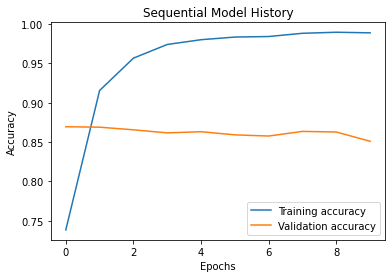

In [98]:
fig = plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
title = plt.title("Sequential Model History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")
plt.show()

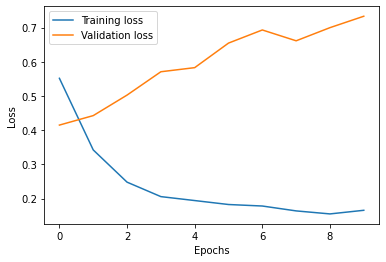

In [99]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Loss")
plt.show()